In [1]:
#Никишев И.О. 224-321

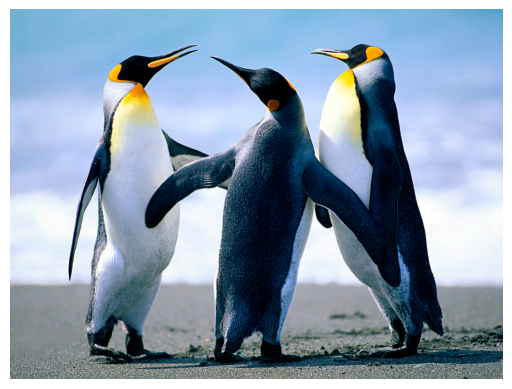

In [2]:
image = '2.jpg'
import cv2, matplotlib.pyplot as plt, numpy as np, math
bgr = cv2.imread(image)
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
def a(a):
    plt.axis('off')
    plt.imshow(a, cmap='gray', vmin=0, vmax=255)
a(rgb)

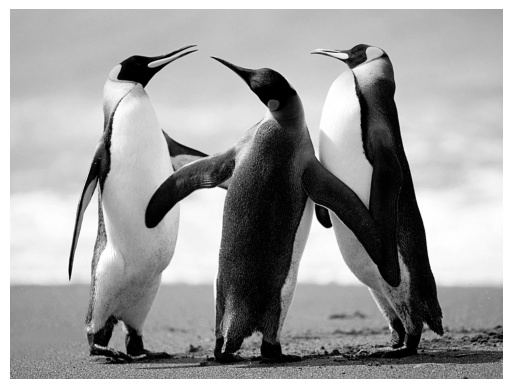

In [3]:
lab = cv2.cvtColor(bgr, cv2.COLOR_BGR2LAB)
bw = lab[:,:,0]
a(bw)

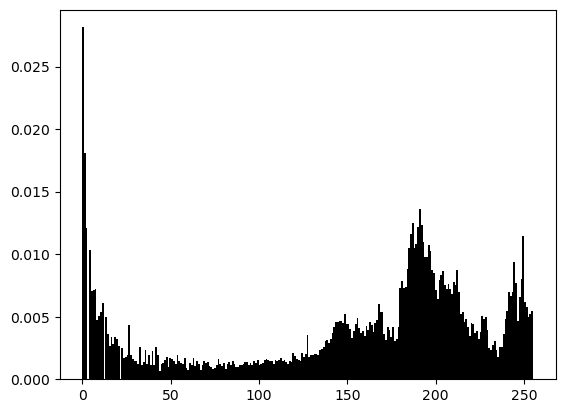

In [4]:
nk = bw.size
bwf = bw.flatten()
plt.hist(bwf, bins = len(np.unique(bwf)), density=True, stacked=True, color='black')
None

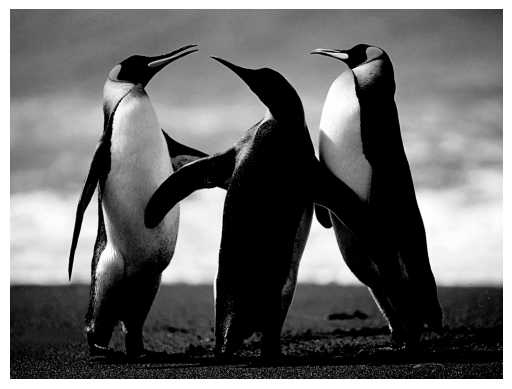

In [12]:
norm = np.clip(bw*2.1-280, 0, 255)
a(norm)

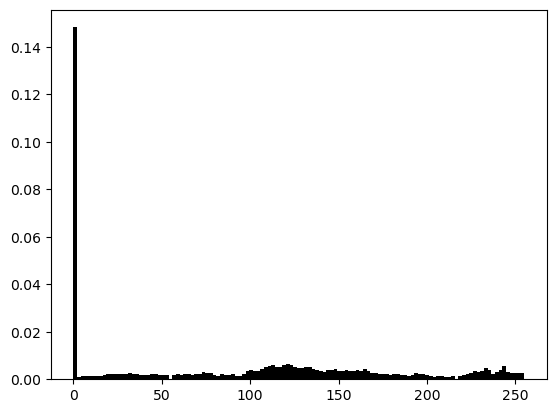

In [14]:
bwf = norm.flatten()
plt.hist(bwf, bins = len(np.unique(bwf)), density=True, stacked=True, color='black')
None

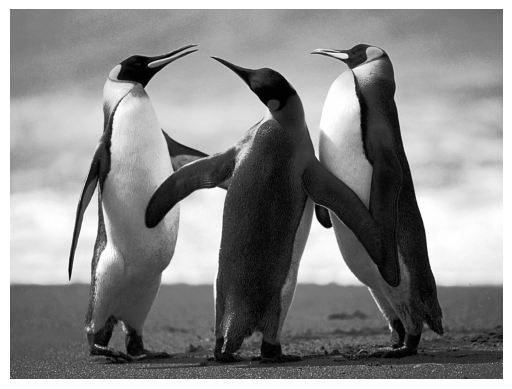

In [7]:
import numpy as np
bwf = bw.flatten()
hist = np.cumsum(np.bincount(bwf)/nk)
def equalize1(i, hist = hist): return 255*hist[i]
equalize = np.vectorize(equalize1, excluded=[1])
eq = equalize(bw, hist).astype(np.uint8)
a(eq)

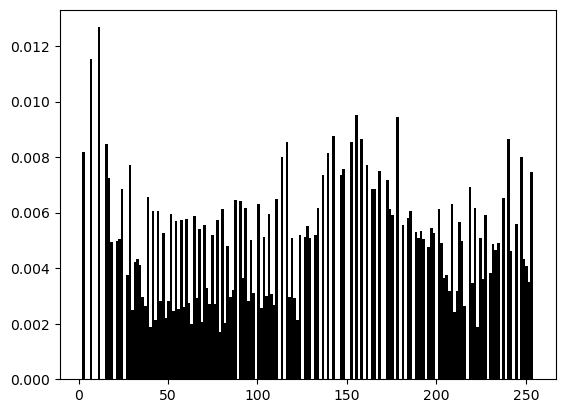

In [8]:
bwf = eq.flatten()
plt.hist(bwf, bins = len(np.unique(bwf)), density=True, stacked=True, color='black')
None

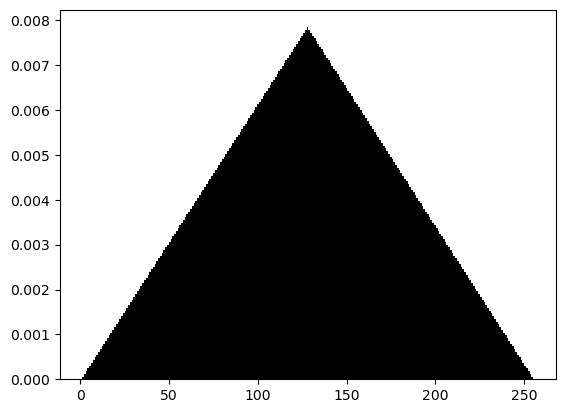

In [9]:
func = [[i]*(128 - abs(128-i)) for i in range(256)]
import itertools
func = list(itertools.chain(*func))
func = np.array([func, func])
bwf = func.flatten()
plt.hist(bwf, bins = len(np.unique(bwf)), density=True, stacked=True, color='black')
None

[[124.1165     124.1165     124.1165     ... 115.7424569  115.7424569
  115.7424569 ]
 [124.66833333 124.1165     124.66833333 ... 116.29932336 116.29932336
  116.29932336]
 [125.0692791  124.66833333 124.66833333 ... 116.29932336 116.94337607
  116.94337607]
 ...
 [ 95.78515625 106.41647196 160.03048246 ... 103.59755609  98.86005892
   93.36613475]
 [ 94.3497807   96.66516323  91.23256341 ... 101.5371732  100.21637789
   95.78515625]
 [ 91.77740036  93.36613475  91.23256341 ...  99.51895833  99.19020833
   92.25582437]]


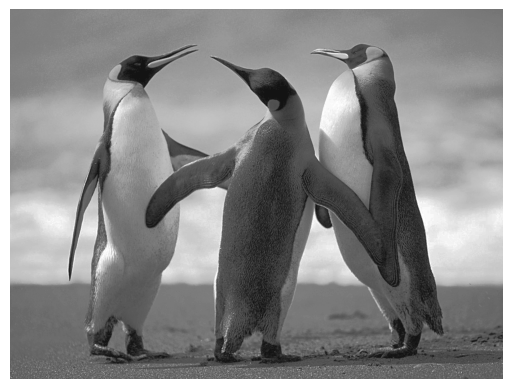

In [10]:
from skimage.exposure import match_histograms
m = match_histograms(bw, func, channel_axis=None)
print(m)
a(m)

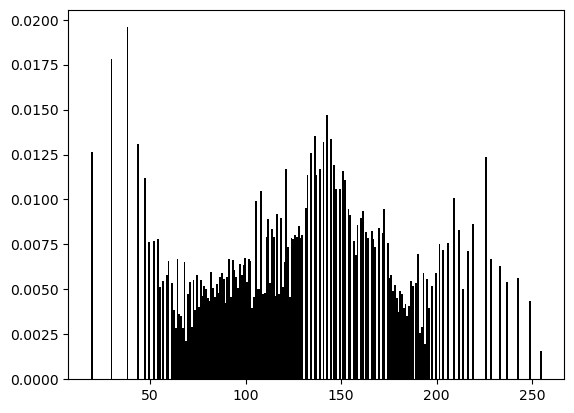

In [11]:
bwf = m.flatten()
plt.hist(bwf, bins = len(np.unique(bwf)), density=True, stacked=True, color='black')
None